In [56]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [57]:
import pandas as pd #numerical analysis library
import numpy as np #data analysis library
import matplotlib.pyplot as plt #Visualization library
import seaborn as sns #visualization library

In [58]:
data = pd.read_csv("day.csv")

In [59]:
# Check the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the data dataframe

In [60]:
data.shape
#importing dataset through pandas library

(730, 16)

In [61]:
data.info()
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [62]:
first_column = data.pop('cnt')#putting the dependent or target variable in another variable
data.insert(0, 'cnt', first_column)#inserting the new column in new dataset
data=data.drop(['casual','registered','instant','mnth','weekday'],axis=1)#dropping all the columns based on domain knowledge, irrelavant on basis on problem statement & data dictionary

In [63]:
data.describe()
#calculating some statistical data like percentile, mean and std of the numerical values of the data

,cnt,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4508.006849,2.498630,0.500000,0.028767,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620
std,1936.011647,1.110184,0.500343,0.167266,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841
min,22.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244
25%,3169.750000,2.000000,0.000000,0.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650
50%,4548.500000,3.000000,0.500000,0.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325
75%,5966.000000,3.000000,1.000000,0.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589
max,8714.000000,4.000000,1.000000,1.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021


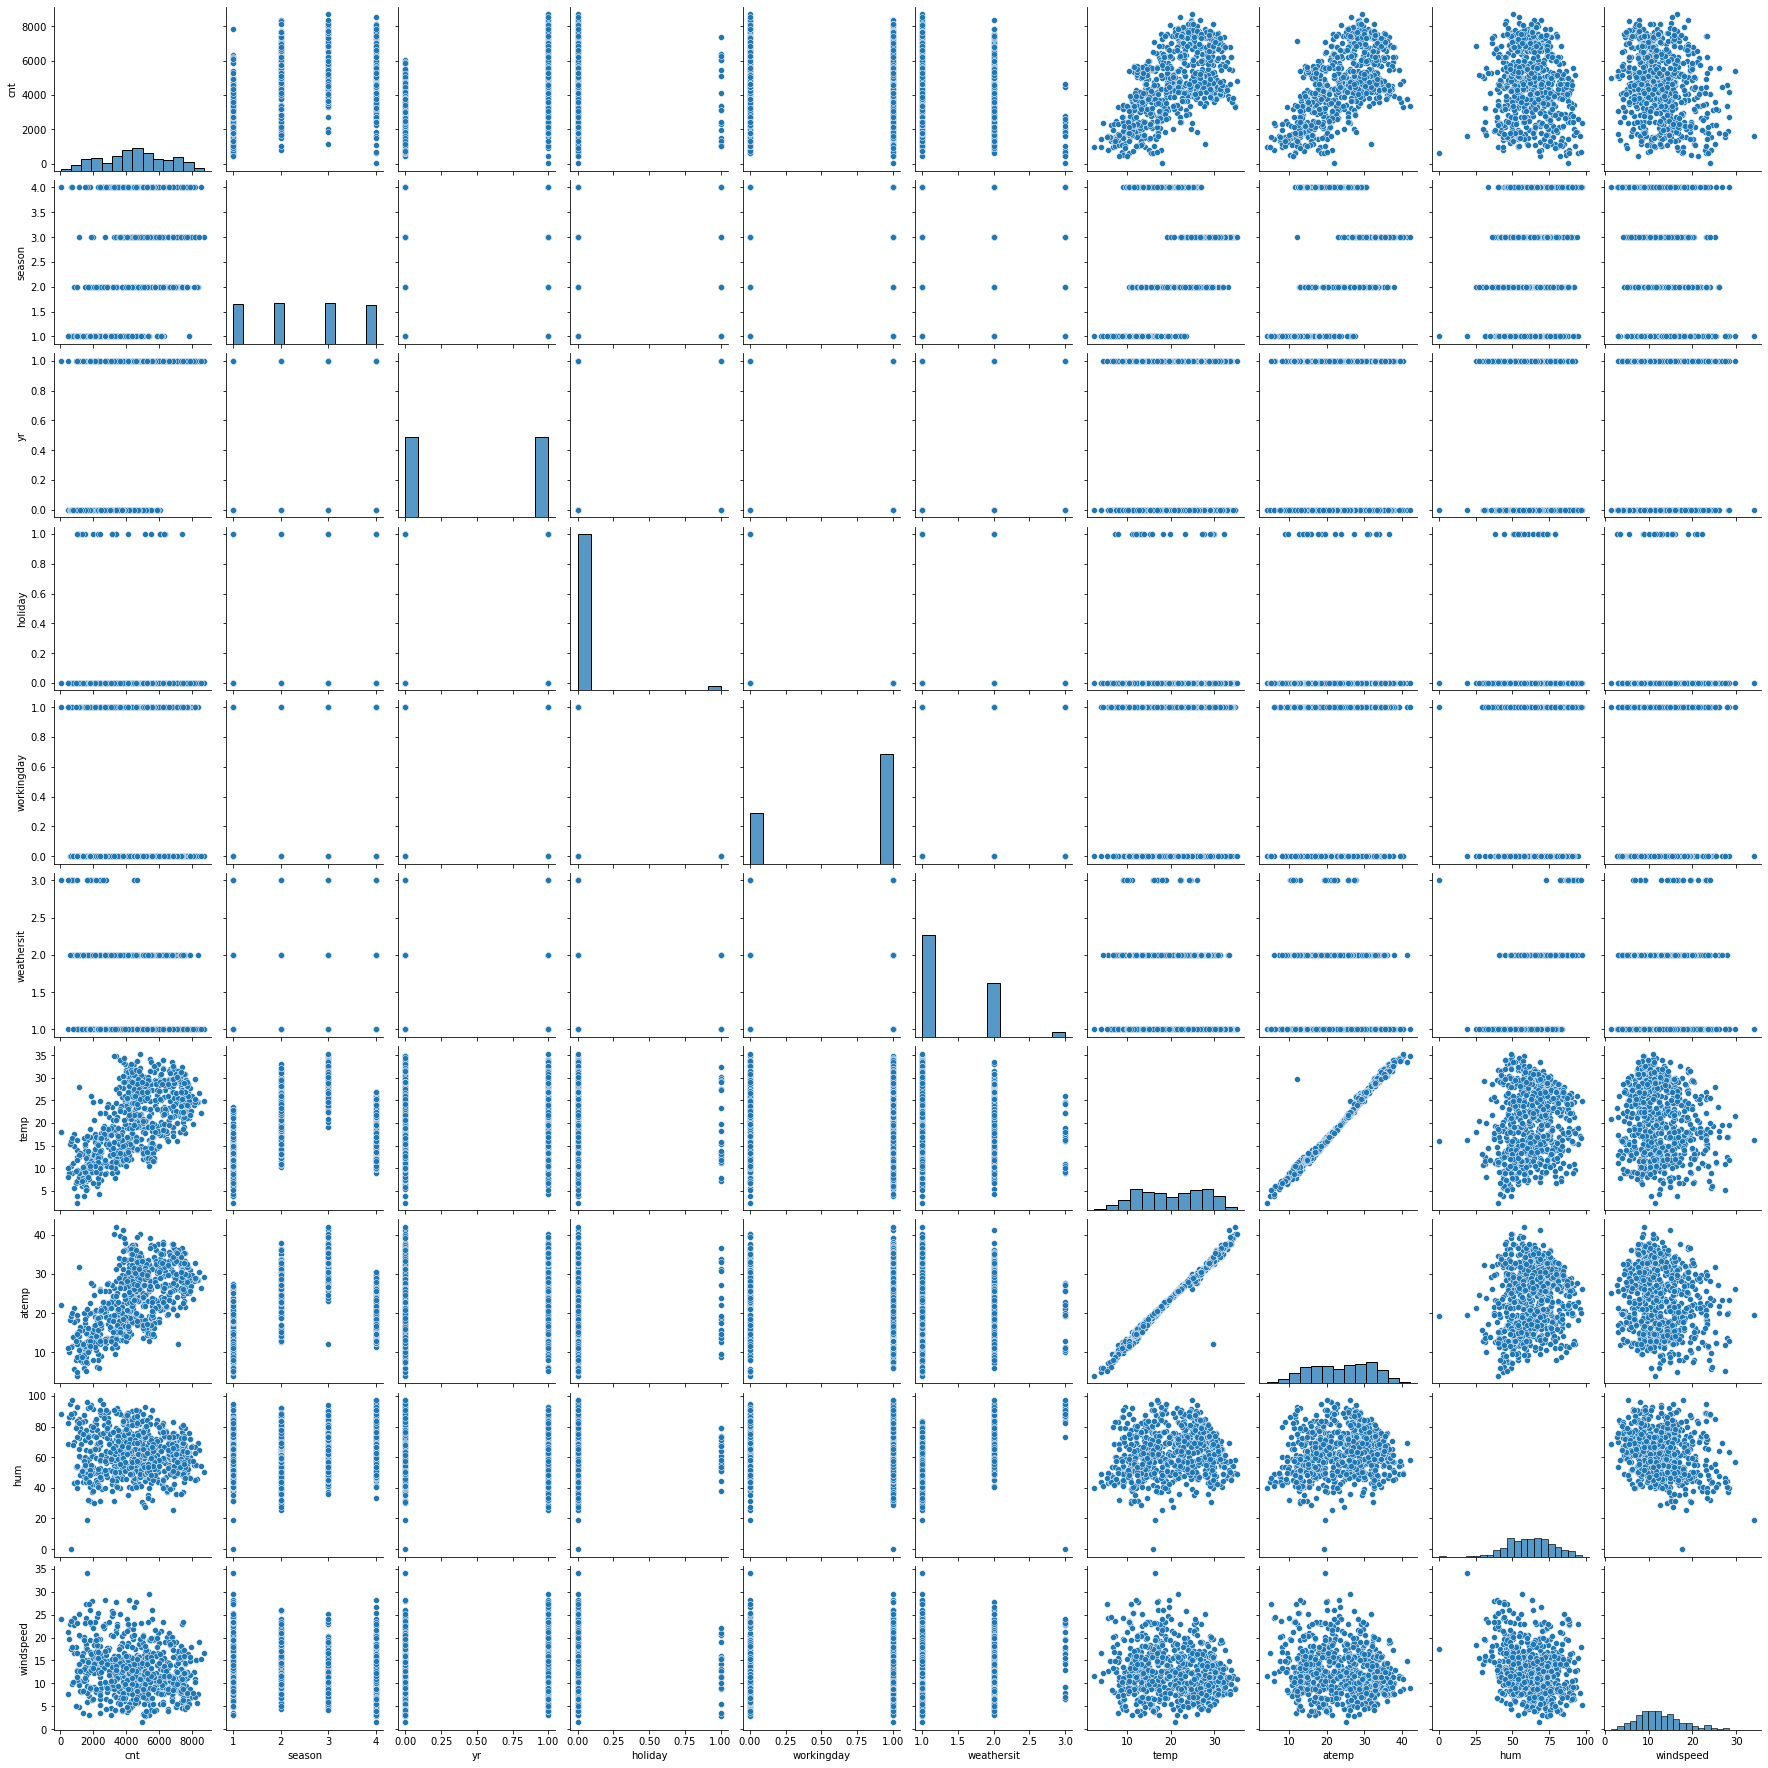

In [64]:
sns.pairplot(data)#pairplot command
plt.show()
#ploting multiple scatterplot for continous variable to understand there relevance relative to target variable

In [65]:
cat_col=['season','yr','holiday','workingday','weathersit']#segrating categorical driver from dataframe for plotting purpose
cont_col=['temp','atemp','hum','windspeed']

season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}#creating season a dictionary to replace 0 or 1 with corresponding categorical value
yr_dict={0:'2018',1:'2019'}#creating yr a dictionary to replace 0 or 1 with corresponding categorical value
holiday_dict={0:'Non-Holiday',1:'Holiday'}#creating holiday a dictionary to replace 0 or 1 with corresponding categorical value
workingday_dict={0:"Non-Working",1:'Working'}#creating working a dictionary to replace 0 or 1 with corresponding categorical value
weathersit_dict={1:'Clear or No Cloud',2:'Mist Cloud',3:'Light Snow or Rain',4:'Heavy Rain or Snow'}#creating a working dictionary to replace 0 or 1 with corresponding categorical value
data1=pd.DataFrame()#creating a new dataframe & adding all the above categorical values into this
data1['season']=data['season'].replace(season_dict)
data1['holiday']=data['holiday'].replace(holiday_dict)
data1['yr']=data['yr'].replace(yr_dict)
data1['workingday']=data['workingday'].replace(workingday_dict)
data1['weathersit']=data['weathersit'].replace(weathersit_dict)


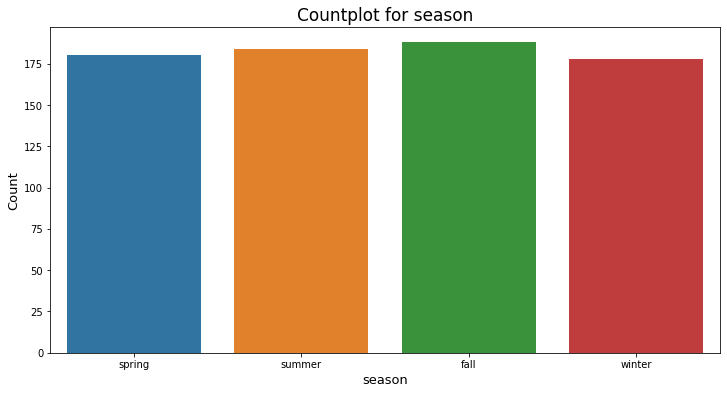

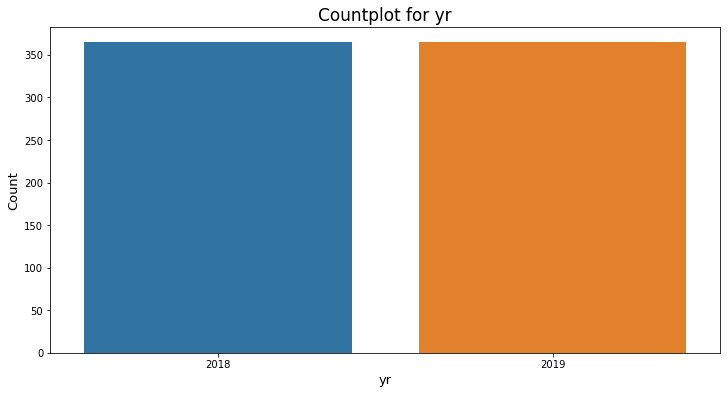

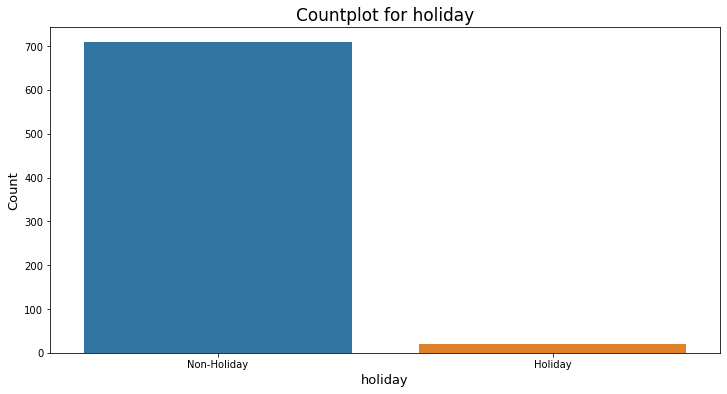

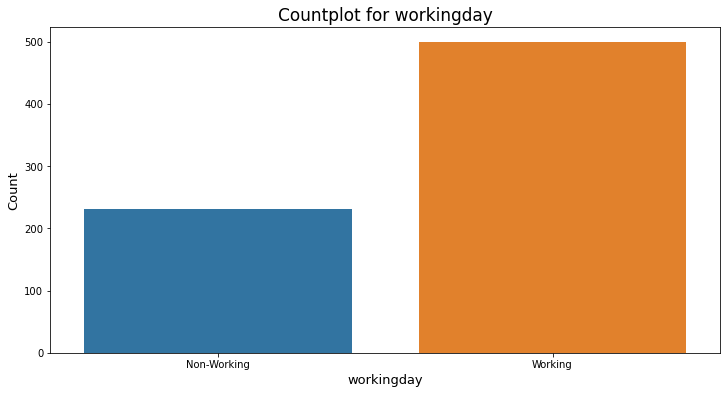

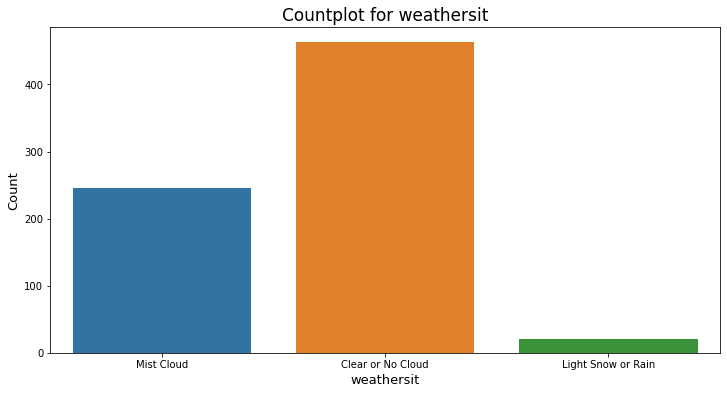

In [66]:


for i in cat_col:
    plt.figure(figsize=(12,6))#fixing the figure size of the plot
    sns.countplot(data1[i])#running command for multiple count plot for categorical variable
    plt.title("Countplot for "+i,size=17) #setting the title for each count plot
    plt.xlabel(i,fontsize=13)#fixing the label size of x axis driver
    plt.ylabel('Count',fontsize=13)##fixing the label size of y axis Count
    plt.show()

#plotting multiplecount plots for categorical variables to understand their relevance & get meaningful insights

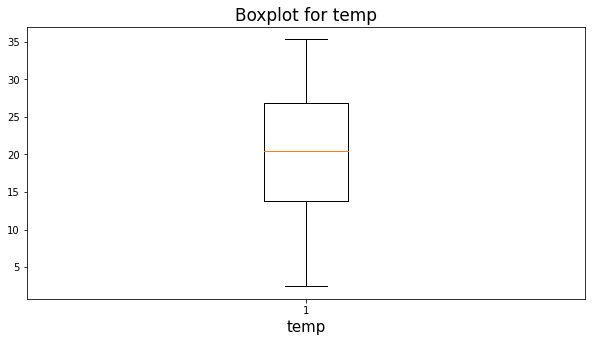

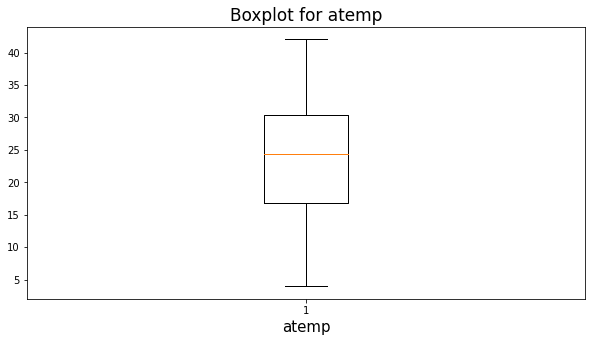

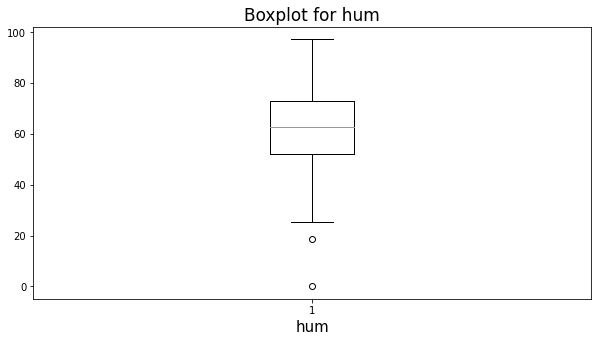

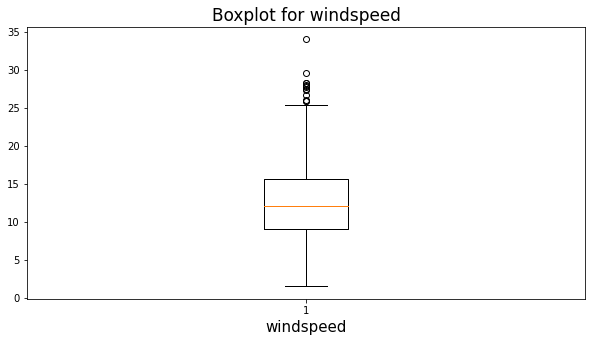

In [67]:
for i in cont_col:
    plt.figure(figsize=(10,5))#fixing the figure size of the plot
    plt.boxplot(data[i])#running command for multiple box plot for categorical variable
    plt.title("Boxplot for "+i,size=17) #setting the title for each box plot
    plt.xlabel(i,fontsize=15)#fixing the label size of x axis driver
    plt.show()

#ploting multiple boxplots for continous drivers to have an understanding of outliers 

In [68]:
# Get the dummy variables for the feature season & weathersit and store it in a new variable - 'status' & 'status1'
status = pd.get_dummies(data1['season'])
status1 = pd.get_dummies(data1['weathersit'])

In [69]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(data1['season'], drop_first = True)
status1 = pd.get_dummies(data1['weathersit'], drop_first = True)

In [70]:
# Add the results to the original data dataframe

data = pd.concat([data, status], axis = 1)
data = pd.concat([data, status1], axis = 1)

In [71]:
# Drop season & weatherit as we have created the dummies for it & holiday as we already have working day which tell 0 as weekend or holiday
data=data.drop(['weathersit','season','dteday'],axis=1)#dropping all the columns based on domain knowledge, irrelavant on basis on problem statement & data dictionary

In [72]:
data.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Light Snow or Rain,Mist Cloud
0,985,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,1
1,801,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,0,1
2,1349,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0
3,1562,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0
4,1600,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0


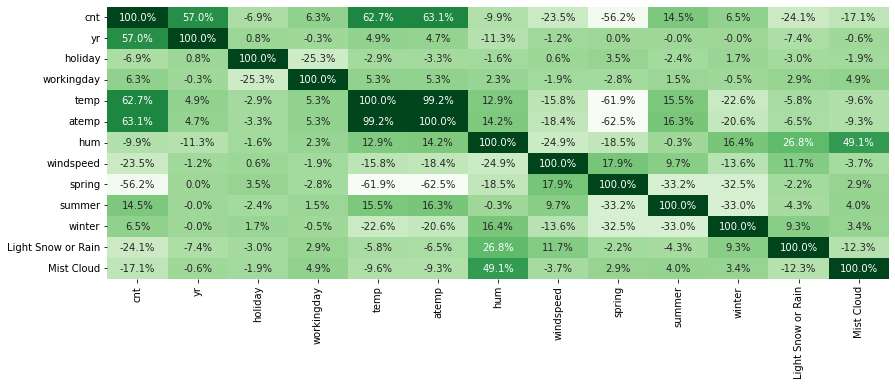

In [73]:
plt.figure(figsize = (14,5)) #fixing the figure size of the plot
sns.heatmap(data.corr(),annot=True,cmap='Greens',fmt='.1%',cbar=False)#running command for heatmap for correlation of continous variable
plt.show()
#correlation matrix formed through heatmap to understand the correlation of continous variables & there relevance

In [74]:
data=data.drop(['atemp'],axis=1)#dropping atemp as it has a high correlation with temp & atemp is a feeling temperature which will be less accurate than temp

In [75]:
from sklearn.model_selection import train_test_split #importing relevant libraries for model building

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [76]:
from sklearn.preprocessing import MinMaxScaler #importing relevant libraries for scaling the model
scaler = MinMaxScaler() #adding the scaling method in a variable


In [77]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [78]:
df_train.head()

,cnt,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow or Rain,Mist Cloud
653,0.864243,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0
576,0.827658,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,0.465255,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1
728,0.204096,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,0.482973,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1


In [79]:
df_train.describe()

,cnt,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow or Rain,Mist Cloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.513620,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.224593,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.356420,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.518638,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.684710,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


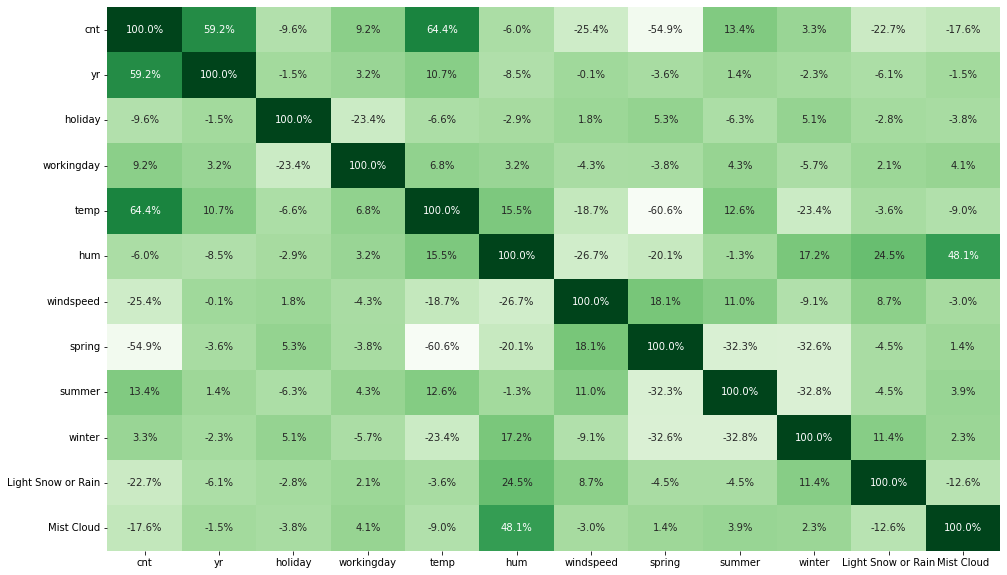

In [80]:
# checking the correlation coefficients to see which variables are highly correlated or to keep a check on multicollinearity

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(),annot=True,cmap='Greens',fmt='.1%',cbar=False )
plt.show()

In [81]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [82]:
from sklearn.feature_selection import RFE #importing relevant libraries to use recursive feature elimination
from sklearn.linear_model import LinearRegression #importing relevant libraries for Linear Regression modelling

In [83]:
# Running RFE with the output number of the variable equal to 8
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step=8)    # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))#checking the list with the top drivers & proceeding ahead with that

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', False, 2),
 ('Light Snow or Rain', True, 1),
 ('Mist Cloud', False, 2)]

In [84]:
import statsmodels.api as sm

# Add a constant or intercept & selecting temp as first feature or driver it has the highest correlation with dependent variable
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [85]:
# Checking the parameters obtained
lr.params

const    0.169798
temp     0.639952
dtype: float64

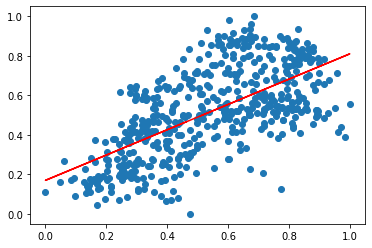

In [86]:
# visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 +0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [87]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           5.80e-61
Time:                        01:19:42   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [88]:
# Assigning additional feature variables to X
X_train_lm = X_train[['Light Snow or Rain','yr','windspeed','temp']]

In [89]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                 0.160981
Light Snow or Rain   -0.216594
yr                    0.234163
windspeed            -0.178269
temp                  0.553313
dtype: float64

In [90]:
# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     355.3
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.90e-145
Time:                        01:19:43   Log-Likelihood:                 379.90
No. Observations:                 510   AIC:                            -749.8
Df Residuals:                     505   BIC:                            -728.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1610      0

Looking at the p-values in the above result we have it looks like the variables are really significant
And also our adjusted R2 has increase from 41% to 73%

In [91]:
# Assigning additional feature variables to X on the basis of the REF & above correlation matrix 
X_train_lm_1 = X_train[['yr','temp','windspeed','spring','Light Snow or Rain','Mist Cloud']]


In [92]:
# Build a linear model with new features

import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)
lr1 = sm.OLS(y_train, X_train_lm_1).fit()
lr1.params

const                 0.320383
yr                    0.236372
temp                  0.362729
windspeed            -0.157135
spring               -0.153830
Light Snow or Rain   -0.271313
Mist Cloud           -0.075476
dtype: float64

In [93]:
# Print the summary of the model

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     362.5
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          4.81e-179
Time:                        01:19:44   Log-Likelihood:                 464.91
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     503   BIC:                            -886.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3204      0

Looking at the p-values in the above result we have it looks like of the variables are really significant
And also our adjusted R2 has increase from 73% to 81%

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing relevant libraries to look for multicollinearity among feature in model lr1
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1.values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#As we can see there is no feature in model lr1 that are high corelation among each other by considering VIF<5

,Features,VIF
0,const,19.77
2,temp,1.64
4,spring,1.61
3,windspeed,1.05
5,Light Snow or Rain,1.04
6,Mist Cloud,1.03
1,yr,1.02


In [95]:
# Assigning additional feature variables to X on the basis of the REF & above correlation matrix 
X_train_lm_2 = X_train[['yr','holiday','windspeed','spring','summer','winter','Light Snow or Rain','Mist Cloud']]

In [96]:
# Build a linear model with new features

import statsmodels.api as sm
X_train_lm_2 = sm.add_constant(X_train_lm_2)

lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params

const                 0.597981
yr                    0.246923
holiday              -0.093006
windspeed            -0.175512
spring               -0.313966
summer               -0.059639
winter               -0.087000
Light Snow or Rain   -0.291361
Mist Cloud           -0.087140
dtype: float64

In [97]:
# Print the summary of the model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     194.1
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          3.64e-148
Time:                        01:19:45   Log-Likelihood:                 398.32
No. Observations:                 510   AIC:                            -778.6
Df Residuals:                     501   BIC:                            -740.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5980      0

Looking at the p-values in the above result we have it looks like the variables are really significant apart from working day as it has p value higher than 0.5
But our adjusted R2 has stopped improving it means we will stick to our previous model lr1 or feature in X_train_lm_1  that are ['Light Snow or Rain','yr','windspeed','temp','Mist Cloud','spring']

#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [98]:
y_train_cnt = lr1.predict(X_train_lm_1)

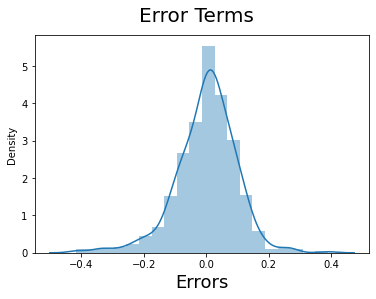

In [99]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

As we can see in the above figure our model residual is perfectly aligned at mean=0 which show its an acceptable model

In [100]:
#Making Predictions Using the Final Model
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

In [101]:
df_test.head()

,cnt,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow or Rain,Mist Cloud
184,0.692706,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,1
535,0.712034,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0
299,0.303382,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,1
221,0.547400,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0
152,0.569029,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0


In [102]:
# Dividing df_test set into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [103]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(X_test)


In [104]:
# Creating X_test_m2 dataframe by dropping variables from X_test_m1

X_test_m2 = X_test_1.drop([ 'workingday','hum','holiday','summer','winter'], axis = 1)
X_test_m2

,const,yr,temp,windspeed,spring,Light Snow or Rain,Mist Cloud
184,1.0,0,0.831783,0.084219,0,0,1
535,1.0,1,0.901354,0.153728,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0
...,...,...,...,...,...,...,...
400,1.0,1,0.257562,0.287411,1,0,1
702,1.0,1,0.519232,0.283397,0,0,0
127,1.0,0,0.584649,0.069510,0,0,0
640,1.0,1,0.745598,0.052115,0,0,1


In [105]:
# Making predictions using the lr1 which has model feature in X_train_lm_1  that are ['Light Snow or Rain','yr','windspeed','temp','Mist Cloud','spring']
from sklearn.metrics import r2_score
y_pred_m2 = lr1.predict(X_test_m2)
r2_score(y_true=y_test,y_pred=y_pred_m2)

0.7922034556420758

As we can see that our R2 score on the test model is 79% which is quite similar to our training model of lr1(below) that is 81%. which shows that our model is quite stable & all the chosen driver are significant one's related to our target variable.

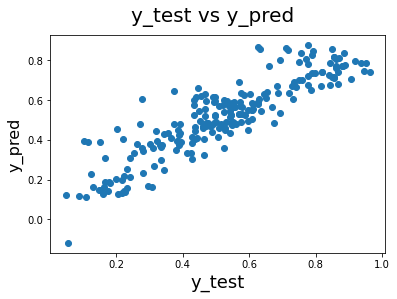

In [106]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()    

In [107]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     362.5
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          4.81e-179
Time:                        01:19:48   Log-Likelihood:                 464.91
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     503   BIC:                            -886.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3204      0

In [108]:
r2_score(y_true=y_test,y_pred=y_pred_m2)

0.7922034556420758

### Our above choosen model lr1 has following coefficients with R2 as 81% on train set & 79% on test set:-
const                 0.320383- Intercept which states the value of our dependent 'cnt' when all our independent variables are kept as 0

yr                    0.236372-  year (0: 2018, 1:2019) which shows as per scatter plot there is an increase in count of total rental bikes including both casual and registered bikes with change in year from 2018 to 2019.

temp                  0.362729 - temperature in Celsius as it has positive coeff which states that if the temperature is going to increase, our count of total rental bikes including both casual and registered is going to increase.

windspeed            -0.157135 - windspeed has negative coeff which states that if the windspeed is going to decrease, our count of total rental bikes including both casual and registered is going to increase.

spring               -0.153830 - spring season has negative coeff which states that as less as spring season is going to be or as ealry spring season is going to over or end, our count of total rental bikes including both casual and registered is going to increase.

Light Snow or Rain   -0.271313 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds has negative coeff which states that the less this type of weather condition is going to be,  is the more our count of total rental bikes including both casual and registered is going to increase.

Mist Cloud           -0.075476 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist has negative coeff which states that the less this type of weather condition is going to be,  is the more our count of total rental bikes including both casual and registered is going to increase.
